In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def generate_white_gaussian_noise(mean, std, num_samples):
    samples = np.random.normal(mean, std, size=num_samples)
    plt.plot(samples)
    plt.show()

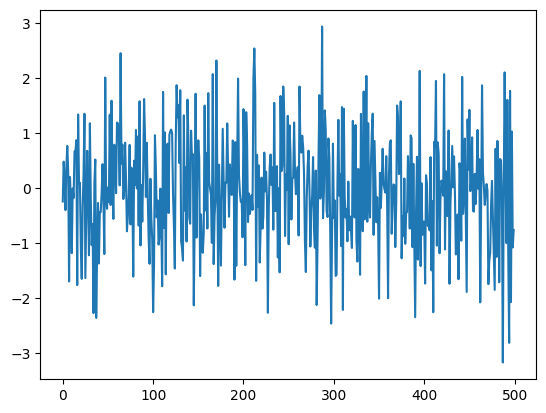

In [40]:
generate_white_gaussian_noise(0, 1, 500)

In [41]:
#mean = [0, 0, 1, -1]
#cov = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
#x0 = np.random.multivariate_normal(mean, cov, 1).T
#plt.plot(x, y, '.')
#plt.show()

In [42]:
#x0.shape

In [43]:
#plt.plot(x)
#plt.plot(y)
#plt.show()

In [44]:
N = 300
dt = 0.1

In [45]:
def state_system(t):
    A = [[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]]
    mean = [0, 0, 1, -1]
    cov = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
    mean2 = [0, 0, 0, 0]
    cov2 = [[(dt**3)/3, 0, (dt**2)/2, 0], [0, (dt**3)/3, 0, (dt**2)/2], [(dt**2)/2, 0, dt, 0], [0, (dt**2)/2, 0, dt]]
    L = [np.random.multivariate_normal(mean, cov, 1).T]
    for i in range(1, t):
        L.append(np.dot(A, L[i-1]) + np.random.multivariate_normal(mean2, cov2, 1).T)
    return L

In [46]:
state_system(N)

[array([[-0.68264033],
        [-0.73902579],
        [ 1.5000303 ],
        [-2.10585434]]),
 array([[-0.53818464],
        [-0.95421285],
        [ 1.72016194],
        [-2.51498223]]),
 array([[-0.38967745],
        [-1.20530434],
        [ 1.3025574 ],
        [-2.36006106]]),
 array([[-0.27230568],
        [-1.41024797],
        [ 1.01260793],
        [-1.95495326]]),
 array([[-0.16339852],
        [-1.60236158],
        [ 1.06340806],
        [-1.74055659]]),
 array([[-0.03493471],
        [-1.77542797],
        [ 1.44002779],
        [-1.59197867]]),
 array([[ 0.0994541 ],
        [-1.89097948],
        [ 1.08050629],
        [-0.96037159]]),
 array([[ 0.21610398],
        [-1.99630154],
        [ 1.48768714],
        [-1.05406172]]),
 array([[ 0.36867461],
        [-2.11386866],
        [ 1.63878754],
        [-1.32319466]]),
 array([[ 0.55577896],
        [-2.23764015],
        [ 1.97271761],
        [-1.33726289]]),
 array([[ 0.74041456],
        [-2.37806679],
        [ 1.63

In [47]:
def measurements(t):
    mean = [0, 0]
    cov = [[4, 0], [0, 4]]
    return state_system(t)[0:2], state_system(t)[0:2] + np.random.multivariate_normal(mean, cov, 1).T

In [48]:
X1=[]
Y2=[]
X2=[]
Y1=[]
X3=[]
X4=[]
V1=[]
V2=[]
mean = [0, 0]
cov = [[4, 0], [0, 4]]
L = state_system(N)
for i in range(len(L)):
    x,y = L[i], L[i][0:2] + np.random.multivariate_normal(mean, cov, 1).T
    X1.append(x[0])
    X2.append(x[1])
    X3.append(x[2])
    X4.append(x[3])
    Y1.append(y[0])
    Y2.append(y[1])
    V1.append((Y1[i]-Y1[i-1])/dt)
    V2.append((Y2[i]-Y2[i-1])/dt)

print(X1)
##plt.plot(X1,X2,'.') 
#plt.plot(Y1,Y2, '.')
#plt.show()

[array([0.56301135]), array([0.59556152]), array([0.65642467]), array([0.71076923]), array([0.75864304]), array([0.79826036]), array([0.80525348]), array([0.78607302]), array([0.75065196]), array([0.71755561]), array([0.67908854]), array([0.60166235]), array([0.53833742]), array([0.46347446]), array([0.3930661]), array([0.28514762]), array([0.22293217]), array([0.16202388]), array([0.11100619]), array([0.07155666]), array([0.04731331]), array([0.02351846]), array([-0.00189278]), array([-0.03115679]), array([-0.05116027]), array([-0.02345823]), array([-0.04763217]), array([-0.06229354]), array([-0.08901832]), array([-0.13877466]), array([-0.20972473]), array([-0.29899658]), array([-0.42035481]), array([-0.53499824]), array([-0.66131825]), array([-0.77163435]), array([-0.91005777]), array([-1.02794216]), array([-1.17201059]), array([-1.31640446]), array([-1.47699547]), array([-1.62939014]), array([-1.73227984]), array([-1.84025633]), array([-1.96056334]), array([-2.03618526]), array([-2.

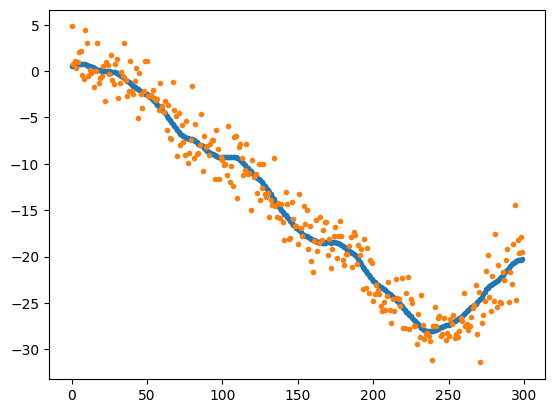

In [49]:
plt.plot(X1, '.') 
plt.plot(Y1, '.')
plt.show()

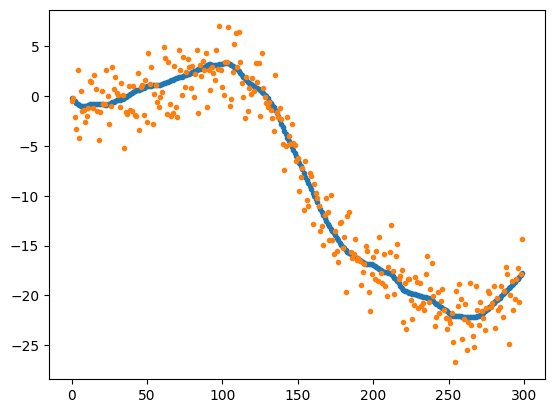

In [50]:
plt.plot(X2,'.') 
plt.plot(Y2,'.')
plt.show()

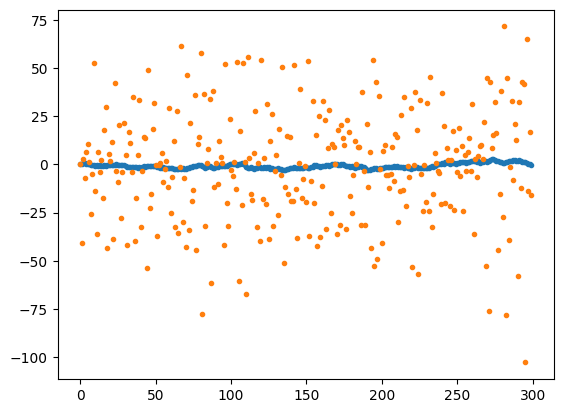

In [51]:
plt.plot(X3,'.') 
plt.plot(V1,'.')
plt.show()

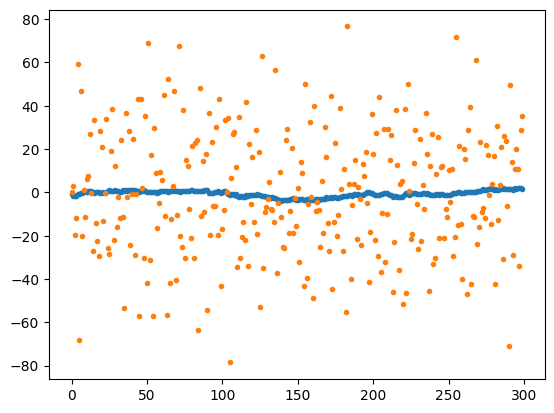

In [52]:
plt.plot(X4,'.') 
plt.plot(V2,'.')
plt.show()

### Kalman filter

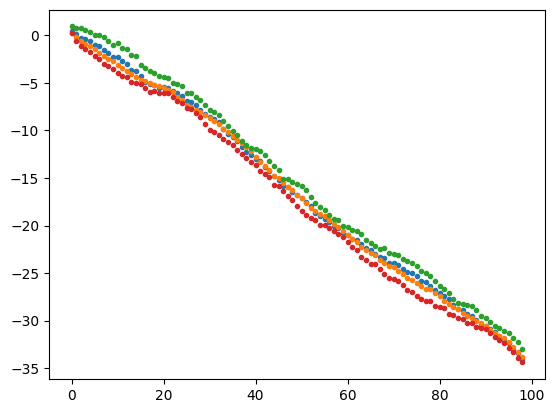

In [53]:
from dataclasses import dataclass
import time

dt = 0.1
A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = [[4, 0], [0, 4]]
Q = [[(dt**3)/3, 0, (dt**2)/2, 0], [0, (dt**3)/3, 0, (dt**2)/2], [(dt**2)/2, 0, dt, 0], [0, (dt**2)/2, 0, dt]]

#data
t = 100
W = state_system(t) #+  np.random.multivariate_normal(np.zeros(2,1), R, t)
mean = [0, 0, 1, -1]

x0 = np.array([1, 0, 1, 0]).reshape(4,1)
m0 = x0

P0 = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
I = P0

Xe = []#np.zeros((4,t))
Pe = []

#print((W[0][0:2]).shape)
for i in range(1, t):

    Y = W[i][0:2] + np.random.multivariate_normal(mean, P0, 1)
    # prediction
    xp = np.dot(A,x0)
    Pp = np.dot(A,np.dot(P0,A.T))+Q
    
    #print(xp)
    #time.sleep(2)

    #correction
    S = np.dot(C,np.dot(Pp,C.T))+R
    K = np.dot(np.dot(Pp,C.T),np.linalg.inv(S))
    xc = xp + np.dot(K,Y-np.dot(C,xp))
    Pc = np.dot(I-np.dot(K,C),Pp)
    #print(xc)
    #time.sleep(5)
    Xe.append(xc)
    #Xe[:][i] = xc
    Pe.append(Pc)

    x0 = xc
    P0 = Pc

#for i in range(t):
 #   print(Xe[i][0])
 #   print(Xe[i][1])
#plt.plot(W[0:t][0],W[0:t][1],'.')


#print(Xe[0][0:t])
P1_corr=[z[0] for z in Xe]
P2_corr=[z[1] for z in Xe]
P3_corr=[z[2] for z in Xe]
P4_corr=[z[3] for z in Xe]

#print(P1_corr)
#print(P2_corr)

plt.plot(P1_corr,'.')

plt.show()





In [54]:
def state_system2(t):
    W = state_system(t)
    A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
    mean = [0, 0, 1, -1]
    cov = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
    # x prediction before 
    X_b = [0]
    # x prediction after
    X_a = [np.random.multivariate_normal(mean, cov, 1).T]
    K = [A[0:2]]
    C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
    P_b = [A]
    P_a = [A]
    R = [[4, 0], [0, 4]]
    Q = [[(dt**3)/3, 0, (dt**2)/2, 0], [0, (dt**3)/3, 0, (dt**2)/2], [(dt**2)/2, 0, dt, 0], [0, (dt**2)/2, 0, dt]]
    for i in range(1, t):
        P_b.append(np.dot(np.dot(A, P_a[i-1]), A.T) + Q)
        K.append(np.dot(np.dot(P_b[i], C.T), np.linalg.inv(np.dot(np.dot(C, P_b[i]), C.T) + R)))
        # Prediction :
        X_b.append(np.dot(A, X_a[i-1]))
        P_a.append(np.dot((cov-np.dot(K[i], C)), P_b[i]))
        # Correction :
        X_a.append(X_b[i] + np.dot(K[i], W[i][0:2] + np.random.multivariate_normal(mean, cov, 1) - X_b[i][0:2]))
    return X_a, P_a


    print()

### Smooth Kalman

In [55]:
#initialization for X and P correction smooth
X_cor_s = np.zeros((4,N))
P_cor_s = np.zeros((4,4))

Ps = list()
for k in range(N-1, -1, -1):
    #correction smooth
    if k == N-1:
        X_cor_s[:,k] = Xe[:,k]
        P_cor_s = Pc[k]
    else:
        xp=np.dot(A,Xe[:,k])
        pp=np.dot(A,np.dot(Pc[k],A.T))+Q
        G = np.dot(Pc[k], np.dot(A.T, np.linalg.inv(pp[k])))
        X_cor_s[:,k] = Xe[:, k] + np.dot(G, (X_cor_s[:,k+1] -xp))
        P_cor_s = Pc[k] + np.dot(G, np.dot((P_cor_s - pp[k+1]), G.T))
    Ps.append(P_cor_s)
    
Ps = np.array(Ps)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
Ps.shape

In [ ]:
plt.figure(figsize=(16,12))
plt.style.use('Solarize_Light2')

plt.plot(X_cor_s[0,:], X_cor_s[1,:], label='(X_s[0], X_s[1])')
plt.legend()
plt.show()